In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [5]:
# Load dataset
df = pd.read_csv('/content/sample_data/Wholesale customers data.csv')

In [6]:
# First 5 rows
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [7]:
# Shape of the dataset
print(f"\nDataset shape: {df.shape}")


Dataset shape: (440, 8)


In [8]:
# Column names and data types
print("\nData Types:")
print(df.dtypes)


Data Types:
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [9]:
# Summary statistics for numeric columns
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000     

In [10]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [11]:
# Check if any categorical variables exist
for col in df.columns:
    unique_vals = df[col].nunique()
    dtype = df[col].dtype
    print(f"Column: {col} | Type: {dtype} | Unique values: {unique_vals}")

Column: Channel | Type: int64 | Unique values: 2
Column: Region | Type: int64 | Unique values: 3
Column: Fresh | Type: int64 | Unique values: 433
Column: Milk | Type: int64 | Unique values: 421
Column: Grocery | Type: int64 | Unique values: 430
Column: Frozen | Type: int64 | Unique values: 426
Column: Detergents_Paper | Type: int64 | Unique values: 417
Column: Delicassen | Type: int64 | Unique values: 403


In [12]:
#droping 'Region' and 'Channel' columns
df = df.drop(['Region', 'Channel'], axis=1)
df.dtypes


,0
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


In [13]:
#Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [14]:
X_scaled

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

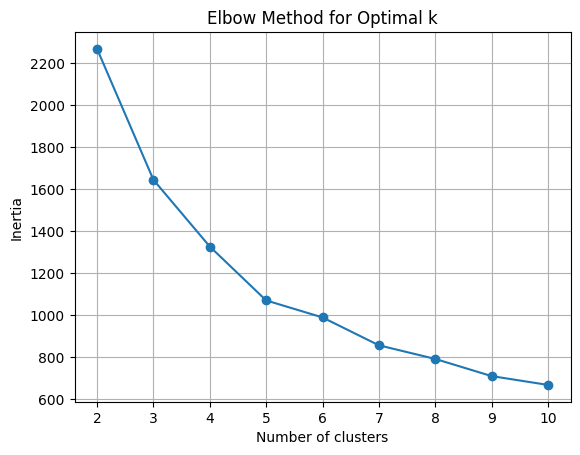

In [16]:
#K-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

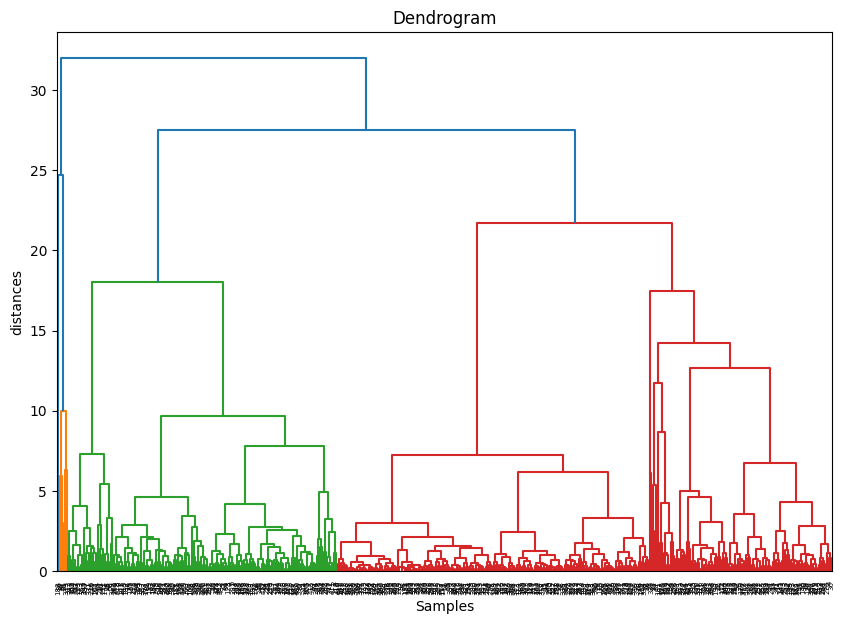

In [17]:
#Agglomerative (Hierarchical) Clustering

from scipy.cluster.hierarchy import dendrogram, linkage


linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("distances")
plt.show()


from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_scaled)
df['Agglomerative_Cluster'] = agg_labels

In [20]:
#DBSCAN Clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

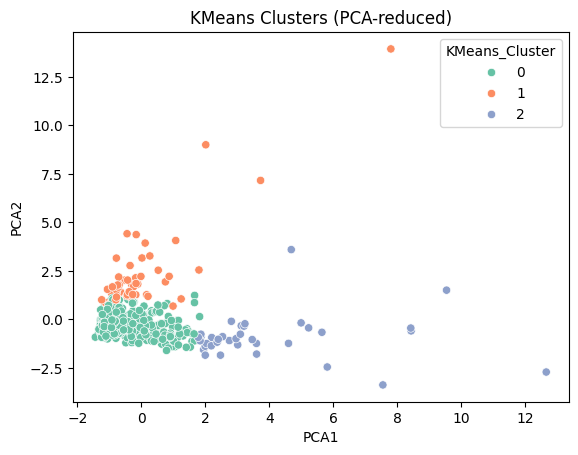

In [21]:
#PCA
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_scaled)
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df, palette='Set2')
plt.title('KMeans Clusters (PCA-reduced)')
plt.show()

